# 데이터 분석 및 정제하기


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0
                , 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

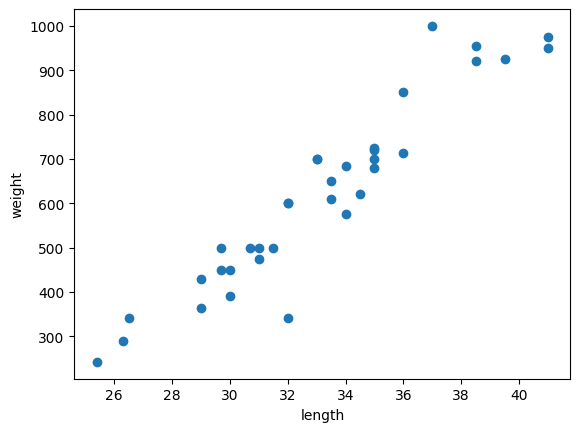

In [3]:
plt.scatter(bream_length, bream_weight) #산점도 그래프 그리기
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [4]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

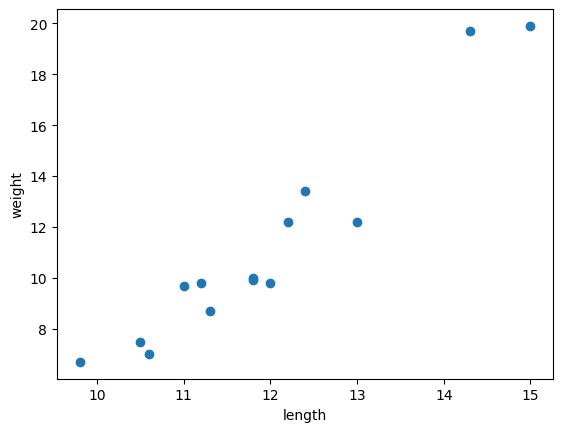

In [5]:
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

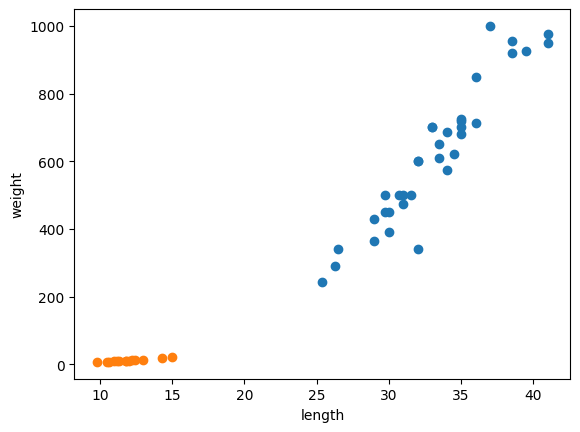

In [6]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [7]:
length=bream_length+smelt_length #리스트 합치기
weight=bream_weight+smelt_weight

In [8]:
fish_data=[[l,w] for l,w in zip(length, weight)] #사이킷런은 2차원데이터를 입력으로 받기 때문에 2차원 리스트로 만들어주기

In [9]:
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [10]:
len(fish_data)

49

In [11]:
fish_target=[1]*35+[0]*14 #타겟데이터
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# k-최근접 이웃 모델 학습 및 평가

In [12]:
kn=KNeighborsClassifier() #k-최근접 이웃 분류기 모델 생성

In [13]:
kn.fit(fish_data,fish_target) #모델 학습

KNeighborsClassifier()

In [14]:
kn.score(fish_data,fish_target) #모델 평가

1.0

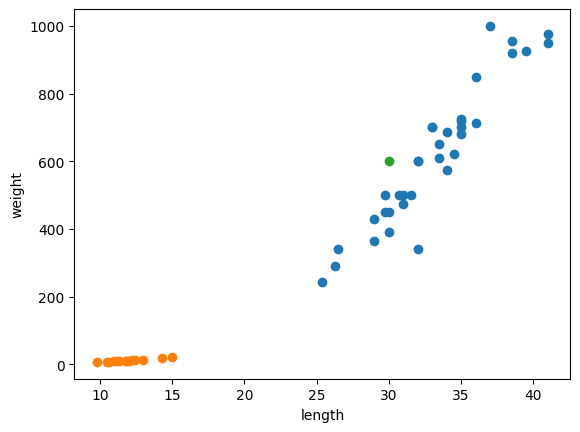

In [15]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter([30],[600])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [16]:
kn.predict([[30,600]])

array([1])

In [17]:
kn.predict([[20,200]])

array([1])

In [18]:
kn.predict([[10,10]])

array([0])

In [19]:
kn49=KNeighborsClassifier(n_neighbors=49) #최근접 이웃의 개수를 49개로 변경

In [20]:
kn49.fit(fish_data,fish_target)
kn49.score(fish_data,fish_target)

0.7142857142857143

# 학습 데이터 훈련 데이터 나누기

In [21]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [22]:
fish_data=[[l,w] for l,w in zip(fish_length, fish_weight)]
fish_target=[1]*35+[0]*14

In [23]:
input_arr=np.array(fish_data) #넘파이 배열 형태로 입력데이터 변형
target_arr=np.array(fish_target)

In [24]:
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [25]:
np.random.seed(42) #랜덤시드 값 42로 고정
index=np.arange(49) #49끼지의 숫자 배열 생성
np.random.shuffle(index) #넘파이의 random.shuffle을 이용해 숫자들을 무작위로 섞어줌

In [26]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [27]:
train_input=input_arr[index[:35]] #훈련 데이터, 훈련 타겟, 테스트 데이터, 테스트 타겟에 무작위로 변경한 인덱스 번호를 적용
train_target=target_arr[index[:35]]

In [28]:
test_input=input_arr[index[35:]]
test_target=target_arr[index[35:]]

In [29]:
print(train_input.shape)
print(test_input.shape)

(35, 2)
(14, 2)


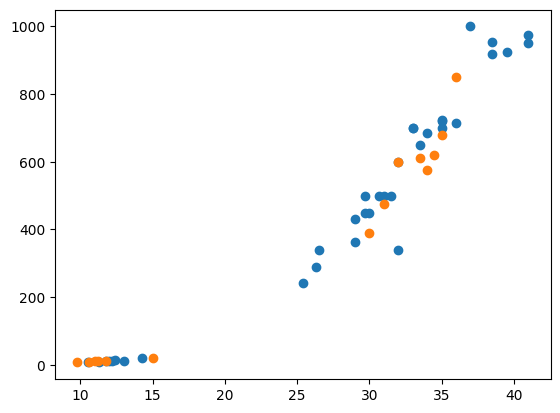

In [30]:
plt.scatter(train_input[:,0], train_input[:,1]) #훈련데이터와 테스트데이터의 길이와 무게를 산점도로 출력. 고르게 분포해있음을 알 수 있다
plt.scatter(test_input[:,0], test_input[:,1])

# 훈련데이터로 학습 및 테스트 데이터로 평가

In [31]:
kn=KNeighborsClassifier()
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [32]:
kn.score(test_input,test_target)

1.0

In [33]:
kn.predict(test_input) #테스트 데이터의 타겟값을 예측

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 회귀

In [34]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

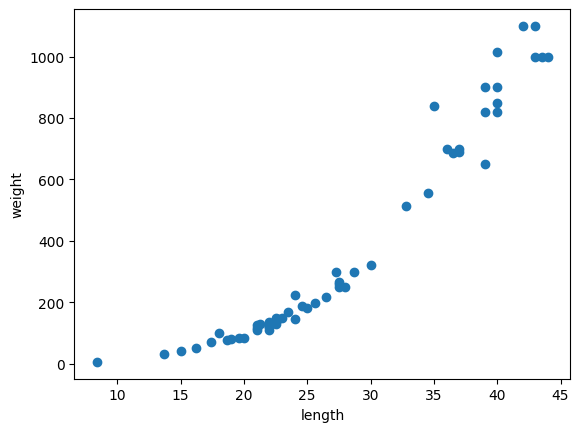

In [35]:
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight,random_state=42)
#훈련데이터와 테스트 데이터를 나누어준다

In [52]:
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(42, 1)
(14, 1)
(42,)
(14,)


In [38]:
train_input=train_input.reshape(-1,1)

In [53]:
test_input=test_input.reshape(-1,1)

In [51]:
print(train_input.shape)
print(test_input.shape)


(42, 1)
(14, 1)


In [41]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor() #K최근접 이웃 회귀 모델 생성
knr.fit(train_input,train_target)

KNeighborsRegressor()

In [42]:
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9698823289099254
0.992809406101064


In [43]:
knr=KNeighborsRegressor(n_neighbors=3) #최대 이웃 개수를 3으로
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

In [44]:
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609


선형회귀

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_input,train_target)

LinearRegression()

In [46]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


In [47]:
from sklearn.preprocessing import PolynomialFeatures
#다항 회귀의 고차항의 최대 차수를 지정할 수 있다
poly=PolynomialFeatures(degree=3)

# 다양한 모델 사용해보기

In [48]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(train_input, train_target)

SVC()

In [55]:
print(svc.score(train_input, train_target))

0.30952380952380953


In [56]:
from sklearn.linear_model import Ridge, Lasso

In [57]:
ridge, lasso=Ridge(), Lasso()

In [59]:
ridge.fit(train_input, train_target)

Ridge()

In [60]:
ridge.score(train_input, train_target)

0.9398462422561089

In [61]:
lasso.fit(train_input, train_target)

Lasso()

In [62]:
lasso.score(train_input, train_target)

0.9398462276262135